Desafío 1: Prepare el ambiente de trabajo
Importe las librerías básicas para el análisis de datos.
Incluya los import base de statsmodels .
Importe la base de datos Credit.csv y elimine la columna Unnamed: 0 .
Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo
minoritario en cada variable. Para el caso de Ethnicity , genere binarias para
AfricanAmerican y Asian .
tip: Utilice value_counts() para revisar la cantidad de casos en las variables
categóricas.


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv("Credit.csv", encoding = "ISO-8859-3", index_col=[0])

In [3]:
df


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
7,20.996,3388,259,2,37,12,Female,No,No,African American,203
8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [4]:
categorical_columns = ["Gender", "Student", "Married", "Ethnicity"]

for cat in categorical_columns:
    print("\n",cat)
    print(df[cat].value_counts())
  


 Gender
Female    207
 Male     193
Name: Gender, dtype: int64

 Student
No     360
Yes     40
Name: Student, dtype: int64

 Married
Yes    245
No     155
Name: Married, dtype: int64

 Ethnicity
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64


In [5]:
df["Ethnicity"].value_counts("%")

Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64

In [6]:
df["binarize_asian"] = np.where(df["Ethnicity"] == "Asian", 1, 0)

In [7]:
df["binarize_AfricanAmerican"] = np.where(df["Ethnicity"] == "African American", 1, 0)

In [8]:
df["Gender"].value_counts("%")

Female    0.5175
 Male     0.4825
Name: Gender, dtype: float64

In [9]:
df["binarize_gender"] = np.where(df["Gender"] == " Male", 1, 0)

In [10]:
df["Student"].value_counts("%")

No     0.9
Yes    0.1
Name: Student, dtype: float64

In [11]:
df["binarize_student"] = np.where(df["Student"] == "Yes", 1, 0)

In [12]:
df["Married"].value_counts("%")

Yes    0.6125
No     0.3875
Name: Married, dtype: float64

In [13]:
df["binarize_married"] = np.where(df["Married"] == "No", 1, 0)

Desafío 2: Genere gráficos descriptivos para las variables
contínuas
Genere una función llamada plot_hist que genere un histograma de la variable e indique la
media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.
¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?


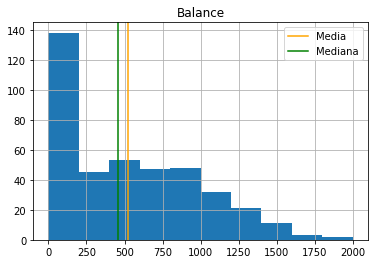

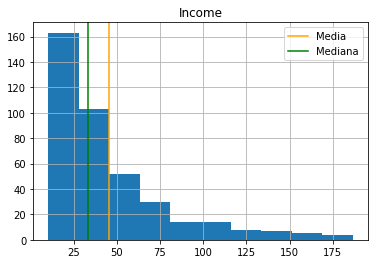

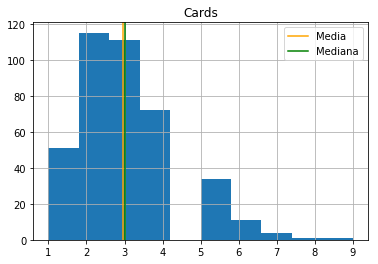

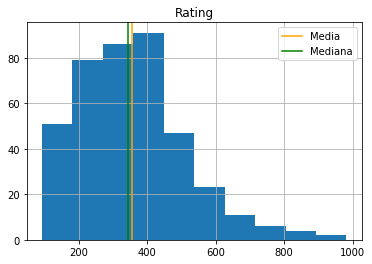

In [14]:
def plot_hist (df, var):
    df[var].hist()
    
    plt.axvline(df[var].mean(), label="Media", color="orange")
    plt.axvline(np.median(df[var]), label="Mediana", color="green")
    
    plt.legend()
                
    plt.title(var)
                
    plt.show()
                
l = ["Balance", "Income", "Cards", "Rating"]
for i in l:
    plot_hist(df, i)            

Desafío 3: Regresión Lineal Simple
A continuación generaremos una serie de modelos simples:
Utilizando statsmodels , comente brevemente los siguientes puntos:
¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?
¿Qué podemos decir sobre el comportamiento de Student ?
¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de
Balance entre aquellos que son y no son estudiantes?

In [15]:
model_student =smf.ols("Balance ~ Student", df).fit()
model_income =smf.ols("Balance ~ Income", df).fit()
model_rating =smf.ols("Balance ~ Rating", df).fit()
model_student_balance =smf.ols("Balance ~ Income + Rating", df).fit()

In [16]:
model_student_balance.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1391.
Date:                Thu, 02 May 2019   Prob (F-statistic):          4.52e-180
Time:                        19:03:13   Log-Likelihood:                -2603.3
No. Observations:                 400   AIC:                             5213.
Df Residuals:                     397   BIC:                             5225.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -534.8122     21.603    -24.757      0.000    -577.282    -492.342
Income        -7.6721      0.378    -20.272      0.000      -8.416      -6.928
Rating         3.9493      0.086     45.810      0.000       3.780       4.119
==============================================================================
Omnibus:                       91.478   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.964
Skew:                           1.320   Prob(JB):                     1.84e-35
Kurtosis:                       4.621   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Desafío 4: Genere un modelo que incluya todos los
regresores
Comente brevemente sobre el poder explicativo en la varianza de y las principales
características de los predictores.


In [17]:
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance', 'binarize_asian',
       'binarize_AfricanAmerican', 'binarize_gender', 'binarize_student',
       'binarize_married'],
      dtype='object')

In [18]:
model_complete = smf.ols("Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity ", df).fit()

In [19]:
model_complete.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Thu, 02 May 2019   Prob (F-statistic):          1.11e-253
Time:                        19:03:15   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -479.2079     35.774    -13.395      0.000    -549.543    -408.873
Gender[T.Female]         -10.6532      9.914     -1.075      0.283     -30.145       8.839
Student[T.Yes]           425.7474     16.723     25.459      0.000     392.869     458.626
Married[T.Yes]            -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethnicity[T.Asian]        16.8042     14.119      1.190      0.235     -10.955      44.564
Ethnicity[T.Caucasian]    10.1070     12.210      0.828      0.408     -13.899      34.113
Income                    -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                      0.1909      0.033      5.824      0.000       0.126       0.255
Rating                     1.1365      0.491      2.315      0.021       0.171       2.102
Cards                     17.7245      4.341      4.083      0.000       9.190      26.259
Age                       -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                 -1.0989      1.598     -0.688      0.492      -4.241       2.043
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Desafío 5: Depure el modelo e incluya sólo los predictores
significativo
En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia
. Comente brevemente sobre el poder explicativo en la varianza de y las
principales características de los predictores.
¿Mejoró o empeoró el modelo con la reducción de regresores?

In [20]:
model_complete = smf.ols("Balance ~ Income + Limit  + Cards + Student ", df).fit()

In [21]:
model_complete.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2029.
Date:                Thu, 02 May 2019   Prob (F-statistic):          8.94e-262
Time:                        19:03:15   Log-Likelihood:                -2405.4
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     395   BIC:                             4841.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -499.7272     15.890    -31.449      0.000    -530.967    -468.488
Student[T.Yes]   429.6064     16.611     25.862      0.000     396.949     462.264
Income            -7.8392      0.232    -33.780      0.000      -8.295      -7.383
Limit              0.2666      0.004     75.271      0.000       0.260       0.274
Cards             23.1754      3.639      6.368      0.000      16.021      30.330
==============================================================================
Omnibus:                       34.751   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.363
Skew:                           0.771   Prob(JB):                     1.04e-09
Kurtosis:                       3.319   Cond. No.                     1.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Desafío 6:
Utilizando lmplot de seaborn , inspeccione el comportamiento de los tres principales
determinantes.

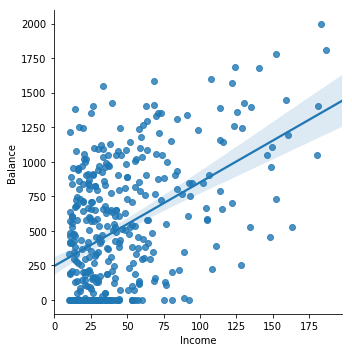

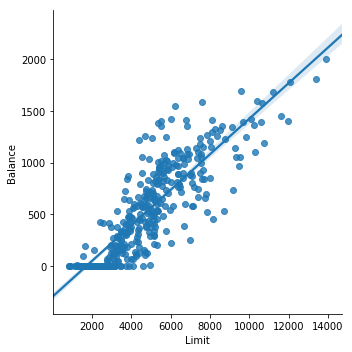

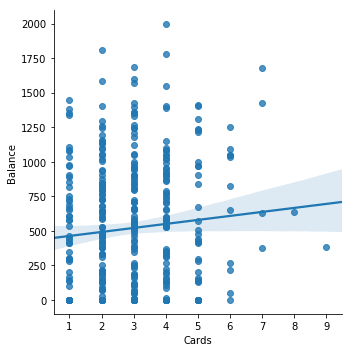

In [23]:
variables =["Income", "Limit", "Cards" ]

for i in variables:
    sns.lmplot(x = i, y = "Balance", data = df)